In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme("notebook")

In [2]:
bike_dataset = pd.read_csv("hour.csv")
bike_dataset.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_dataset.duplicated().sum()


0

In [4]:
bike_dataset.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [5]:
bike_dataset = bike_dataset.rename(columns={'yr':'year',
                                            'mnth':'month',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour',
                                           'dteday':'datetime'
                                              })
print(bike_dataset.columns)

Index(['instant', 'datetime', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [6]:
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   datetime    17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# bike_dataset['season'] = bike_dataset['season'].map({
#     1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
# }).astype('O')

# bike_dataset['weekday'] = bike_dataset['weekday'].map({
#     0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday',
#     4: 'Wednesday', 5: 'Thursday', 6: 'Friday'
# }).astype('O')

bike_dataset['year'] = bike_dataset['year'].astype("bool")

# bike_dataset['weather'] = bike_dataset['weather'].map({
#     1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'
# }).astype('O')

# bike_dataset['hour'] = bike_dataset['hour'].astype('O')
# bike_dataset['month'] = bike_dataset['month'].astype('O')
bike_dataset['holiday'] = bike_dataset['holiday'].map({1: True, 0: False})
bike_dataset['workingday'] = bike_dataset['workingday'].map({1: True, 0: False})
bike_dataset['datetime'] = pd.to_datetime(bike_dataset['datetime'])

In [8]:
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  bool          
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  bool          
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [9]:
bike_dataset.describe()

,instant,datetime,season,month,hour,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,6.537775,11.546752,3.003683,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,4.000000,6.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,7.000000,12.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,10.000000,18.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,12.000000,23.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,3.438776,6.914405,2.005771,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [10]:
bike_dataset.drop(columns=["instant"],inplace=True)

In [11]:
print(len(bike_dataset.columns))


16


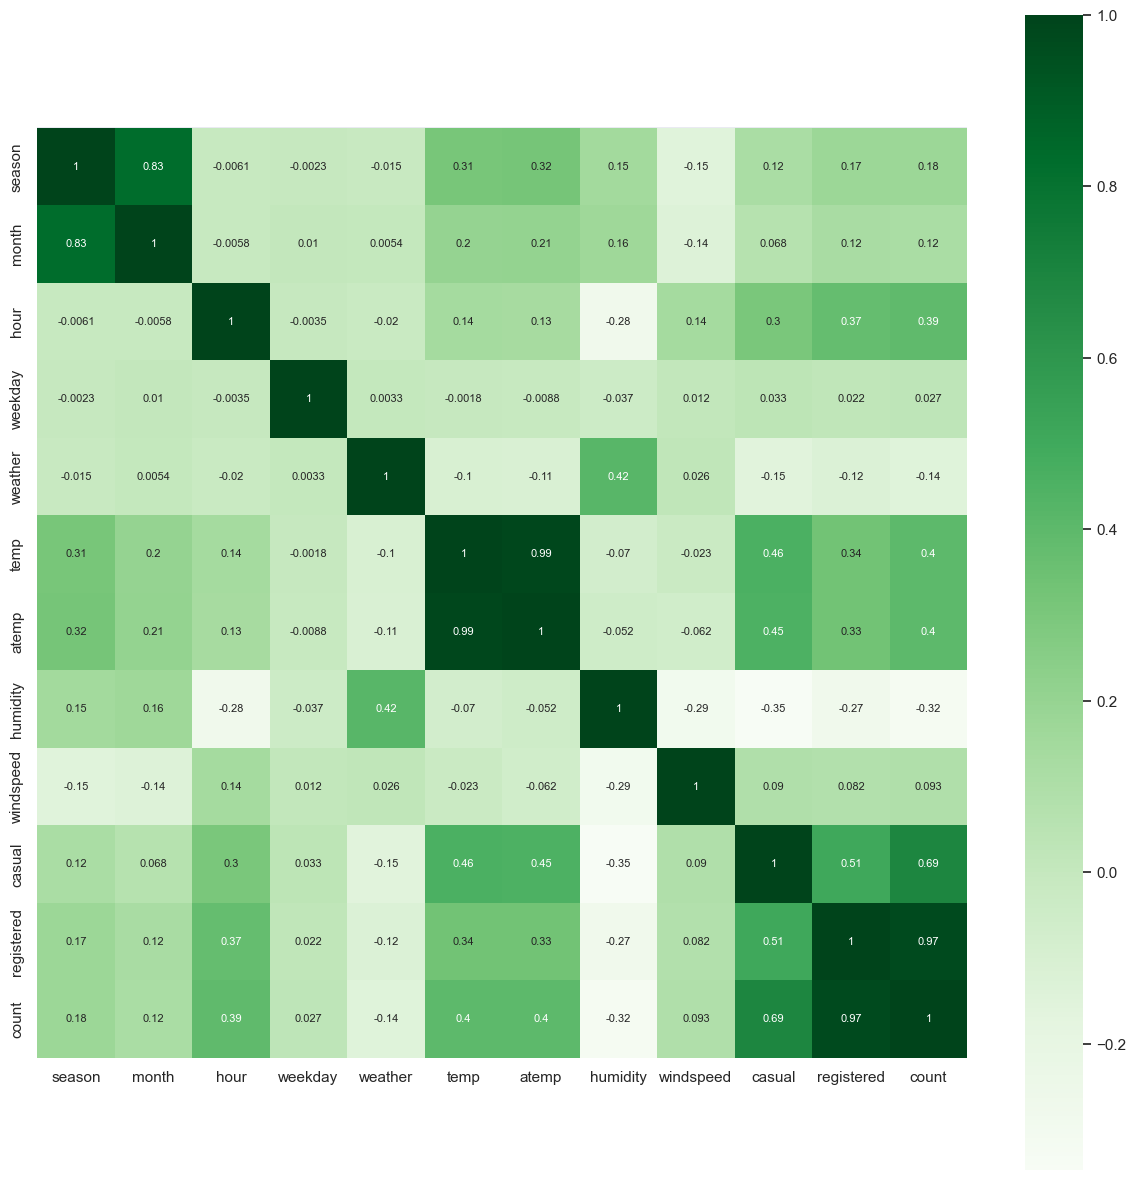

In [12]:
numeric_data = bike_dataset.select_dtypes(include=['int64', 'float64'])
correlation_values = numeric_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Greens')
plt.show() 


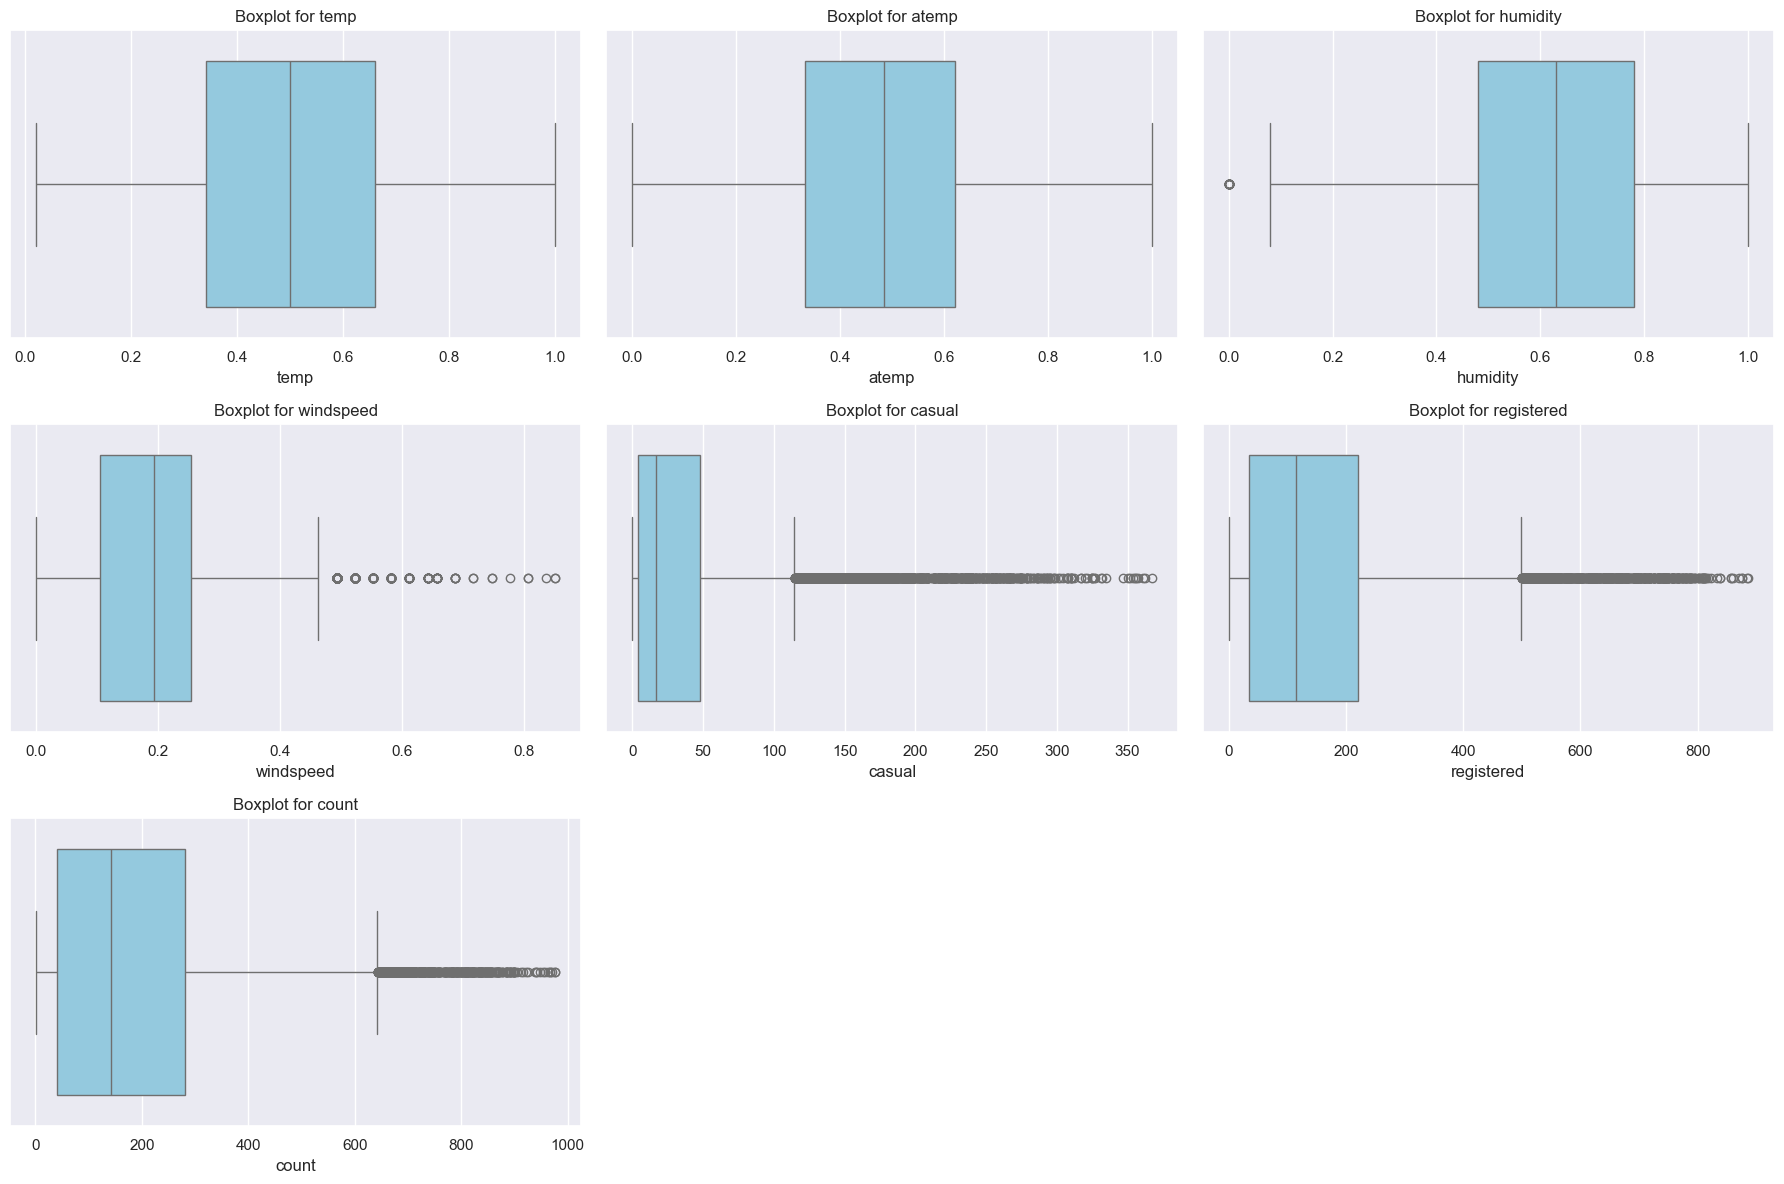

In [13]:
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=bike_dataset[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [14]:
#check outlier
numeric_cols = bike_dataset.select_dtypes(include=['int64', 'float64']).columns
Q1 = bike_dataset['count'].quantile(0.10)
Q3 = bike_dataset['count'].quantile(0.85)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bike_dataset[(bike_dataset['count'] < lower_bound) | (bike_dataset['count'] > upper_bound)]
# outliers.style.background_gradient(cmap='Greys')

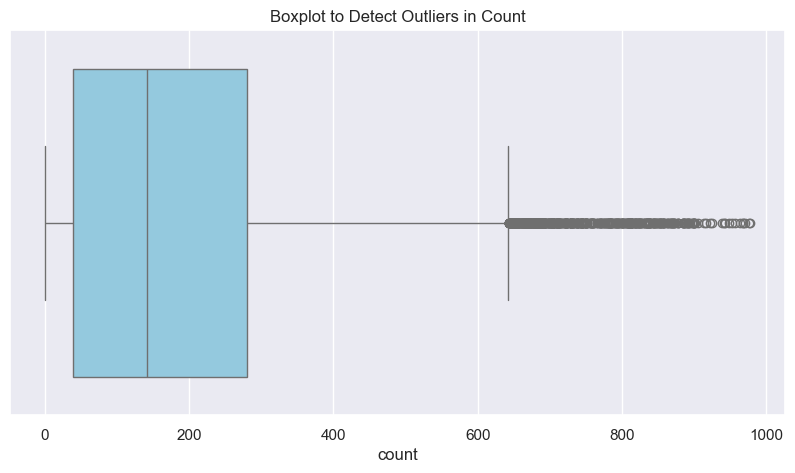

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=bike_dataset['count'], color='skyblue')
plt.title('Boxplot to Detect Outliers in Count')
plt.xlabel('count')
plt.show()

In [16]:
#removing outliers
bike_dataset = bike_dataset[(bike_dataset['count'] >= lower_bound) & (bike_dataset['count'] <= upper_bound)]
print("shape after outliers removal :",bike_dataset.shape)
#17,099 rows from ~17,379 → 280 rows removed

shape after outliers removal : (17367, 16)


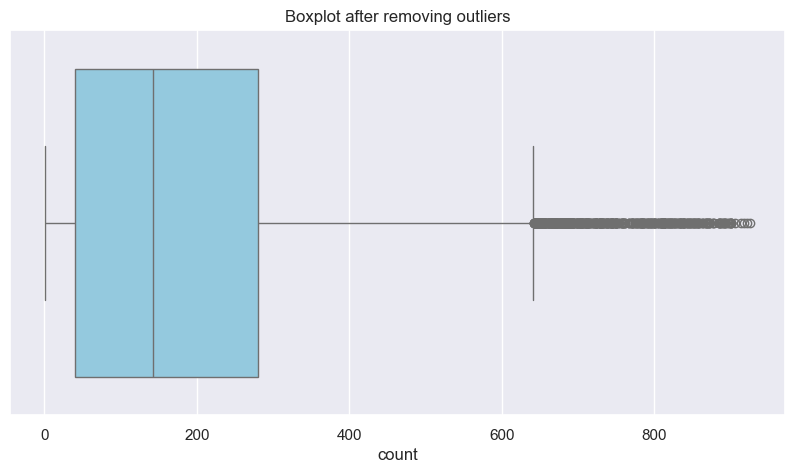

In [17]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['count'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('count')
 plt.show()

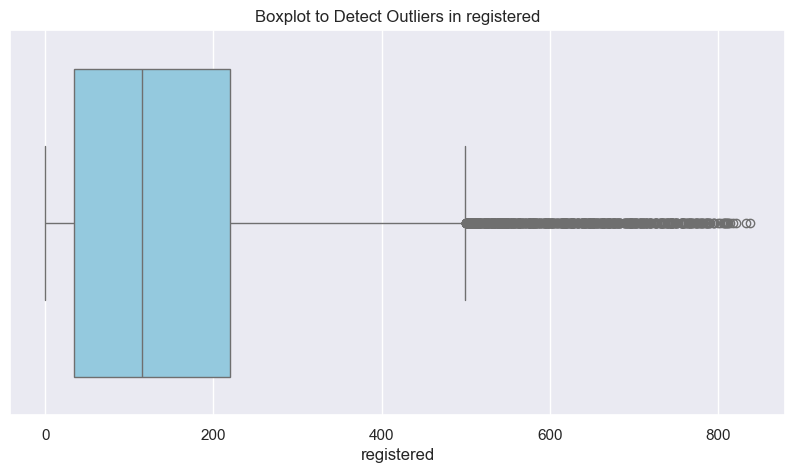

In [18]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['registered'], color='skyblue')
 plt.title('Boxplot to Detect Outliers in registered')
 plt.xlabel('registered')
 plt.show()

In [19]:

Q1 = bike_dataset['registered'].quantile(0.25)
Q3 = bike_dataset['registered'].quantile(0.80)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = bike_dataset[(bike_dataset['registered'] >= lower_bound) & (bike_dataset['registered'] <= upper_bound)]


In [20]:
bike_dataset = bike_dataset[(bike_dataset['registered'] >= lower_bound) & (bike_dataset['registered'] <= upper_bound)]
print("shape after outliers removal :",bike_dataset.shape)

shape after outliers removal : (16930, 16)


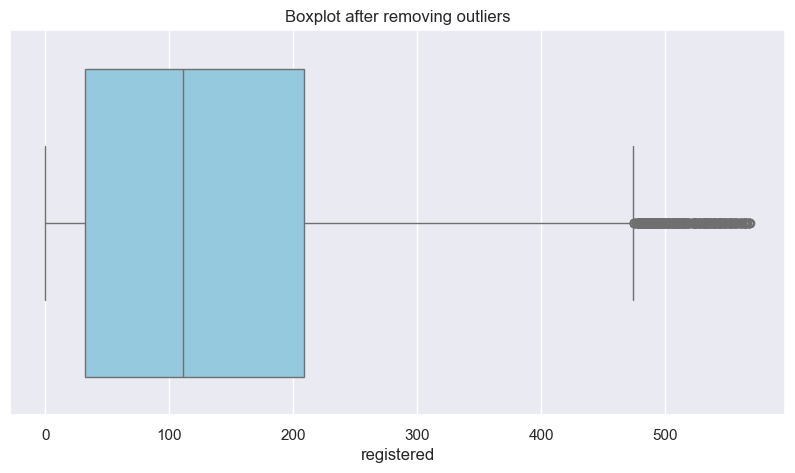

In [21]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['registered'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('registered')
 plt.show()

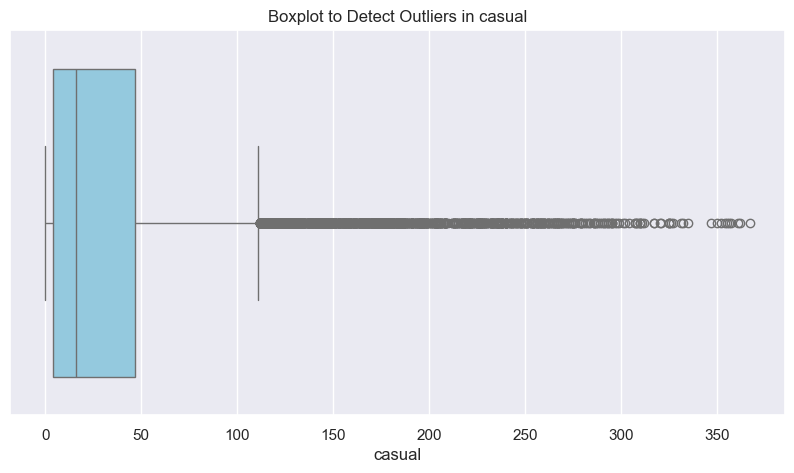

In [22]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['casual'], color='skyblue')
 plt.title('Boxplot to Detect Outliers in casual')
 plt.xlabel('casual')
 plt.show()

In [23]:
 Q1 = bike_dataset['casual'].quantile(0.15)
Q3 = bike_dataset['casual'].quantile(0.85)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = bike_dataset[(bike_dataset['casual'] >= lower_bound) & (bike_dataset['casual'] <= upper_bound)]


In [24]:
 bike_dataset = bike_dataset[(bike_dataset['casual'] >= lower_bound) & (bike_dataset['casual'] <= upper_bound)]
 print("shape after outliers removal :",bike_dataset.shape)

shape after outliers removal : (16364, 16)


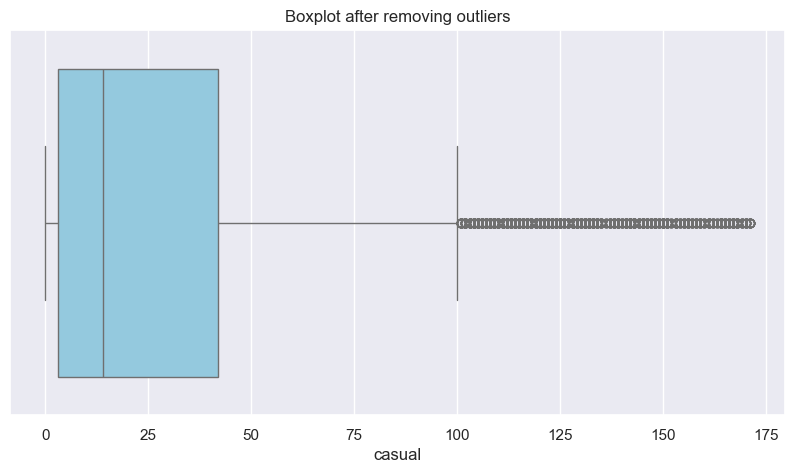

In [25]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['casual'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('casual')
 plt.show()

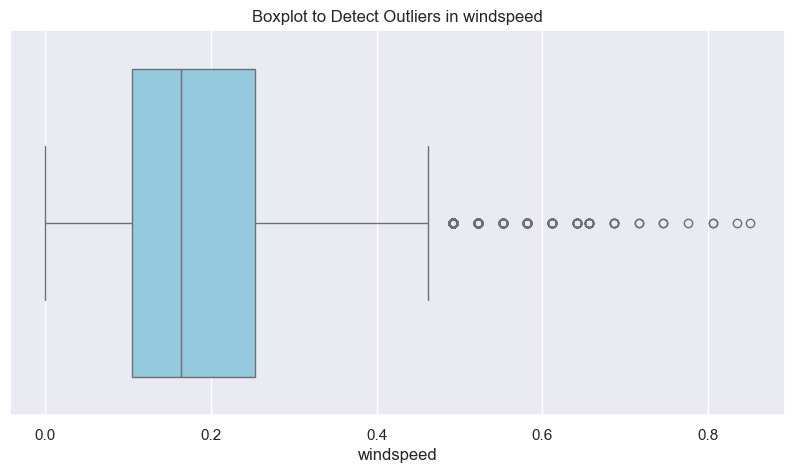

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=bike_dataset['windspeed'], color='skyblue')
plt.title('Boxplot to Detect Outliers in windspeed')
plt.xlabel('windspeed')
plt.show()



In [27]:
def remove_outliers_iteratively(bike_dataset):
    prev_shape = None
    while prev_shape != bike_dataset.shape:
        prev_shape = bike_dataset.shape
        Q1 = bike_dataset['windspeed'].quantile(0.20)
        Q3 = bike_dataset['windspeed'].quantile(0.80)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        bike_dataset = bike_dataset[
            (bike_dataset['windspeed'] >= lower) & 
            (bike_dataset['windspeed'] <= upper)
        ]
    return bike_dataset

In [28]:
bike_dataset = remove_outliers_iteratively(bike_dataset)
print("shape after outliers removal :",bike_dataset.shape)

shape after outliers removal : (16259, 16)


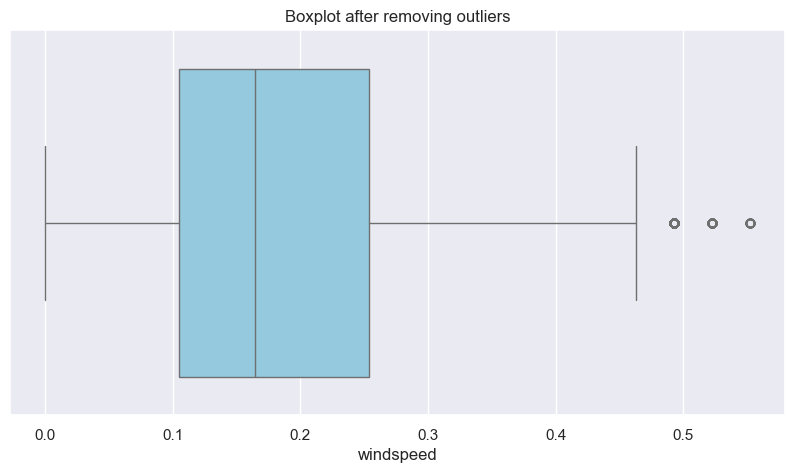

In [29]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['windspeed'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('windspeed')
 plt.show()

In [30]:
# function to determine if a given hour is typically a rush hour
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return 1
    else:
        return 0

# create the new 'rush_hour' feature
bike_dataset['rush_hour'] = bike_dataset['hour'].apply(is_rush_hour)

bike_dataset.head().style.background_gradient(cmap='Greens')

,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,rush_hour
0,2011-01-01 00:00:00,1,False,1,0,False,6,False,1,0.240000,0.287900,0.810000,0.000000,3,13,16,0
1,2011-01-01 00:00:00,1,False,1,1,False,6,False,1,0.220000,0.272700,0.800000,0.000000,8,32,40,0
2,2011-01-01 00:00:00,1,False,1,2,False,6,False,1,0.220000,0.272700,0.800000,0.000000,5,27,32,0
3,2011-01-01 00:00:00,1,False,1,3,False,6,False,1,0.240000,0.287900,0.750000,0.000000,3,10,13,0
4,2011-01-01 00:00:00,1,False,1,4,False,6,False,1,0.240000,0.287900,0.750000,0.000000,0,1,1,0


In [31]:
bike_dataset['rush_hour'] = bike_dataset['rush_hour'].map({0: True, 1: False})

In [32]:
x=bike_dataset.drop(columns=['casual','registered','count','datetime'],axis=1)
y = bike_dataset['count'].copy()

<Axes: xlabel='count', ylabel='Count'>

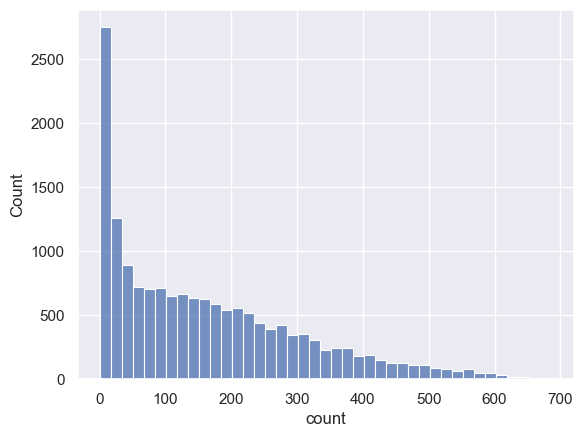

In [33]:
sns.histplot(x=y)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# from category_encoders import BinaryEncoder

In [37]:
# all features are numerical and normalized
# num_cols=['atemp','temp','humidity','windspeed']
num_cols=x.select_dtypes(exclude="O").columns.to_list()
# num_cols=["hour","weekday","month","weather",'atemp','temp','humidity','windspeed']
cat_cols=x.select_dtypes(include="O").columns.to_list()
# unnorm=["hour","weekday","month","weather"]

In [38]:

def prep(train, test, d=2):
    numerical_transformer = Pipeline(steps=[  
        ('poly', PolynomialFeatures(degree=d))])
    
    cat_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder(drop='first'))])
    
    preprocessor = ColumnTransformer(transformers=[
        ('num_prep', numerical_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])
    
    x_train_preprocessed = preprocessor.fit_transform(train)
    x_test_preprocessed = preprocessor.transform(test)
    
    return x_train_preprocessed, x_test_preprocessed



In [39]:
x_train_preprocessed, x_test_preprocessed = prep(x_train, x_test, d=4)


In [40]:
from sklearn.linear_model import Ridge
# Linear Regression
r = Ridge(alpha=0.1)
r.fit(x_train_preprocessed, y_train)
r.score(x_train_preprocessed,y_train)

0.888937718888464

In [41]:
r.score(x_test_preprocessed,y_test)

0.8732463774754596

In [42]:
from sklearn.metrics import mean_squared_error
y_pred = r.predict(x_test_preprocessed)
mean_squared_error(y_test, y_pred)

2735.7047738197844